In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

In [3]:
# Load the data.
data = loadmat('EEG-4.mat')    # Load the EEG data
EEG = data['EEG'].reshape(-1)  # Extract the EEG variable
t = data['t'][0]  

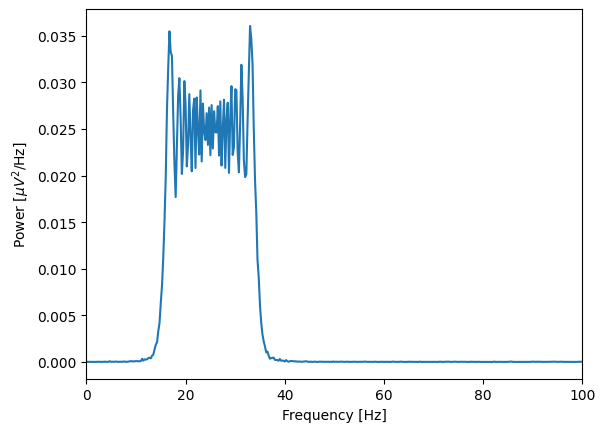

In [4]:
# Compute the power spectrum using the FFT function.

#Define useful quantities
dt = t[2]-t[1]
f0 = 1/dt
N = np.size(EEG)
T = N*dt

x  = EEG
xf = np.fft.fft(x)                        # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[0:int(N / 2)].real              # Ignore negative frequencies

# Define the frequency axis
df = 1/T                     # Determine frequency resolution
fNQ = f0 / 2                 # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)  # Construct frequency axis

# Plot the spectrum versus frequency.
plt.plot(faxis, Sxx)
plt.xlim([0, 100])                          # Select frequency range
plt.xlabel('Frequency [Hz]')                # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]');

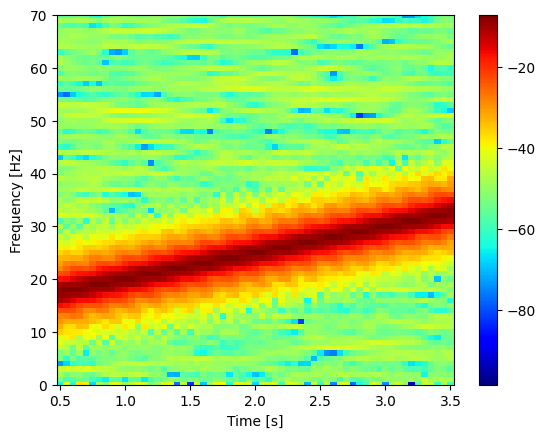

In [5]:
# Plot the spectrogram.

Fs = 1 / dt               # Define the sampling frequency,
interval = int(Fs)        # ... the interval size,
overlap = int(Fs * 0.95)  # ... and the overlap intervals

                          # Compute the spectrogram
f0, t0, Sxx0 = spectrogram(
    EEG,                  # Provide the signal,
    fs=Fs,                # ... the sampling frequency,
    nperseg=interval,     # ... the length of a segment,
    noverlap=overlap)     # ... the number of samples to overlap,
plt.pcolormesh(t0, f0, 10 * np.log10(Sxx0),
               cmap='jet')# Plot the result
plt.colorbar()            # ... with a color bar,
plt.ylim([0, 70])             # ... set the frequency range,
plt.xlabel('Time [s]')       # ... and label the axes
plt.ylabel('Frequency [Hz]');